<a href="https://colab.research.google.com/github/Harshavardhan88/ELEVATELABS-TASK2/blob/main/ELEVATELABS-TASK2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Install Required Libraries

In [1]:
!pip install pandas matplotlib seaborn plotly


# Step 2: Import Libraries

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# Step 3: Load Dataset

In [3]:
df = pd.read_csv('titanic.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Step 4: Check Missing Values

In [18]:
df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


# Step 5: Generate Summary Statistics

In [19]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [20]:
df.median(numeric_only=True)


,0
PassengerId,446.0000
Survived,0.0000
Pclass,3.0000
Age,28.0000
SibSp,0.0000
Parch,0.0000
Fare,14.4542


# Step 6: Histograms for Numeric Features

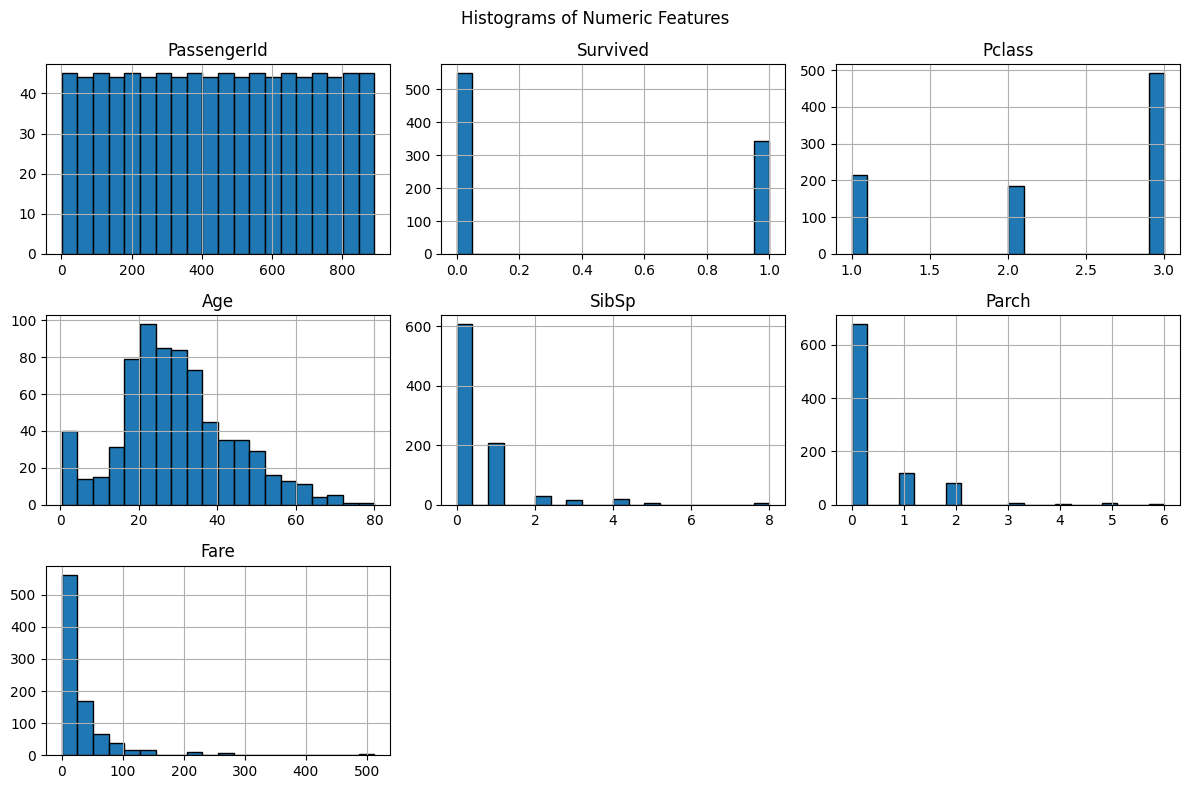

In [21]:
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols].hist(bins=20, figsize=(12, 8), edgecolor='black')
plt.suptitle("Histograms of Numeric Features")
plt.tight_layout()
plt.show()


# Step 7: Boxplots for Numeric Features

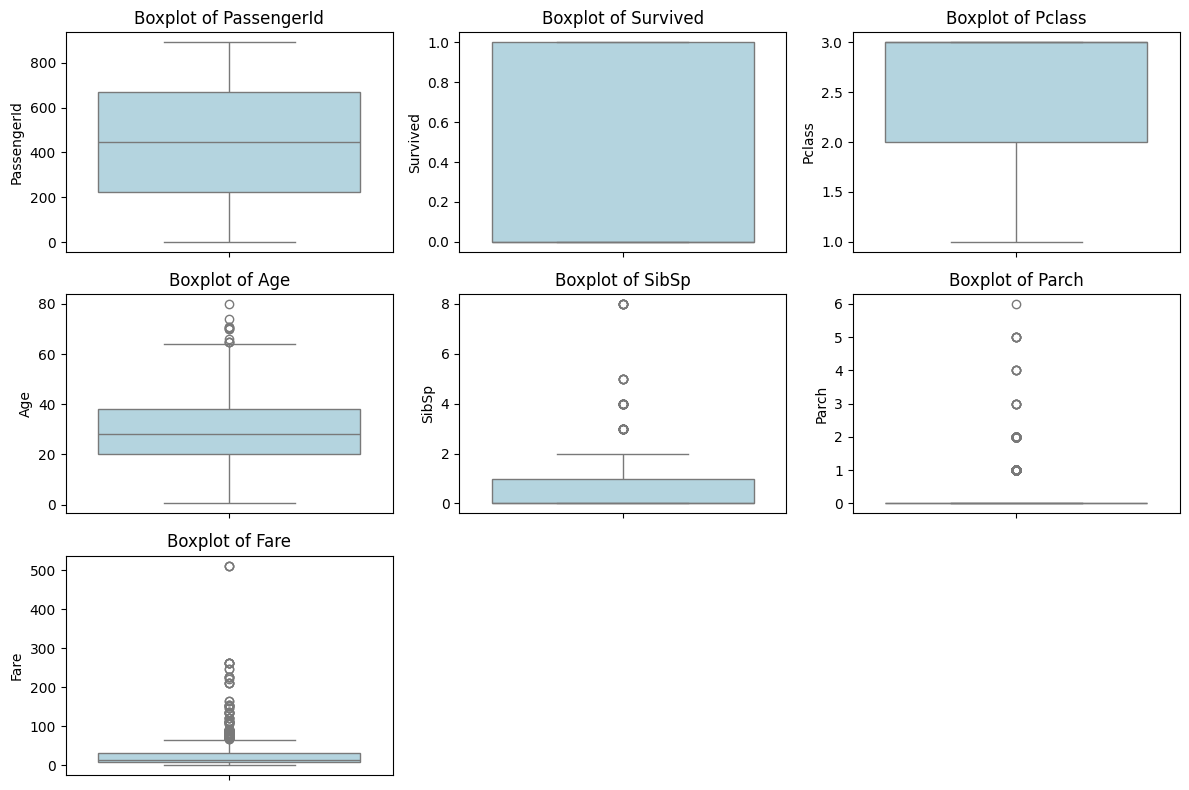

In [22]:
plt.figure(figsize=(12, 8))
num_cols = len(numeric_cols)
num_rows = (num_cols + 2) // 3

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(num_rows, 3, i)
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

# Step 8: Correlation Matrix

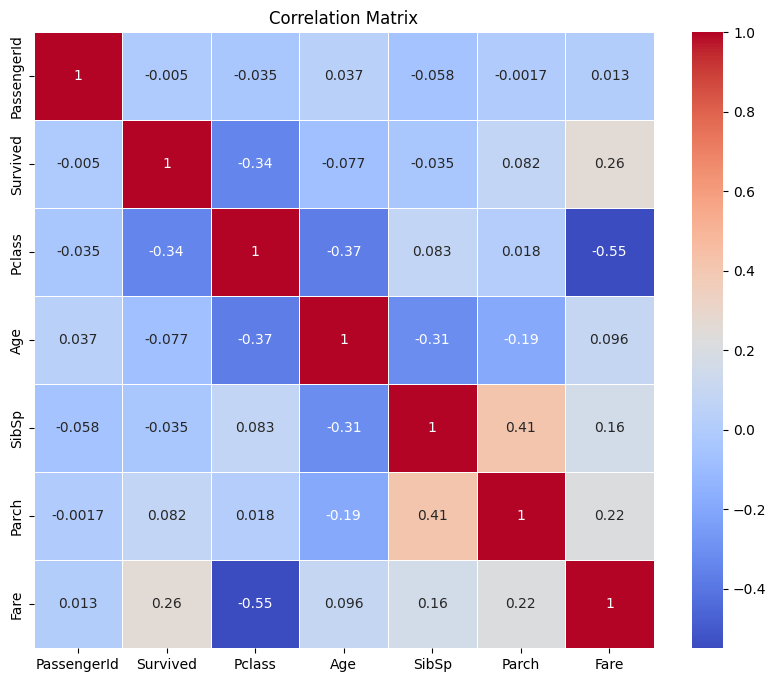

In [23]:
plt.figure(figsize=(10, 8))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


# Step 9: Pairplot of Selected Features

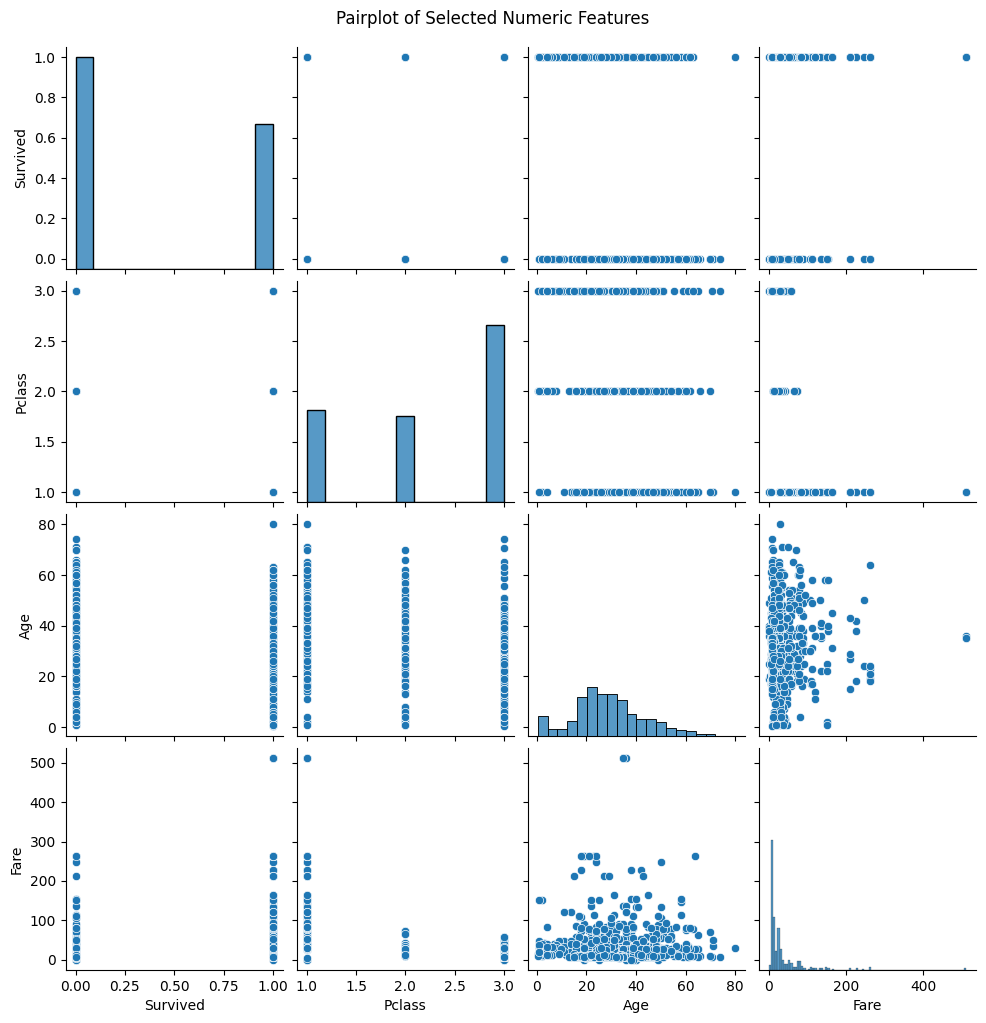

In [24]:
selected_cols = ["Survived", "Pclass", "Age", "Fare"]
sns.pairplot(df[selected_cols].dropna())
plt.suptitle("Pairplot of Selected Numeric Features", y=1.02)
plt.show()


# Step 10: Interactive Plotly Histogram

In [25]:
fig = px.histogram(df, x="Age", color="Survived", nbins=30,
                   title="Age Distribution by Survival", barmode='overlay')
fig.show()


# Step 11: Interactive Boxplot with Plotly

In [26]:
fig2 = px.box(df, x="Pclass", y="Fare", color="Pclass",
              title="Fare Distribution by Passenger Class")
fig2.show()


# Step 12: Survival Rate by Gender

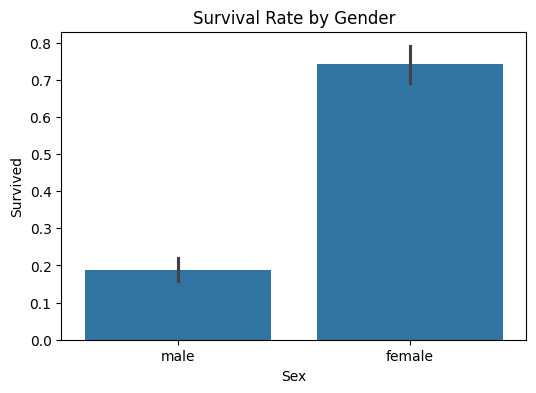

In [27]:
plt.figure(figsize=(6, 4))
sns.barplot(x="Sex", y="Survived", data=df)
plt.title("Survival Rate by Gender")
plt.show()


# Step 13: Survival Rate by Passenger Class

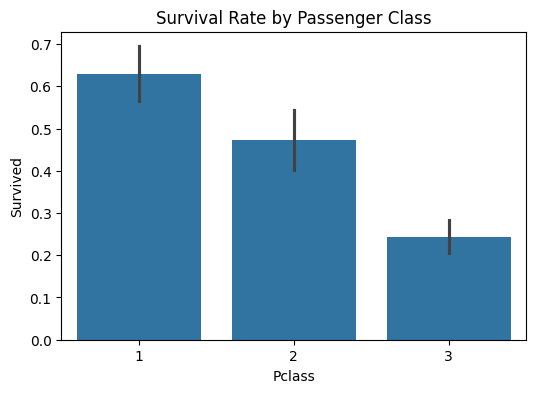

In [28]:
plt.figure(figsize=(6, 4))
sns.barplot(x="Pclass", y="Survived", data=df)
plt.title("Survival Rate by Passenger Class")
plt.show()


# Step 14: Age Distribution by Survival and Gender

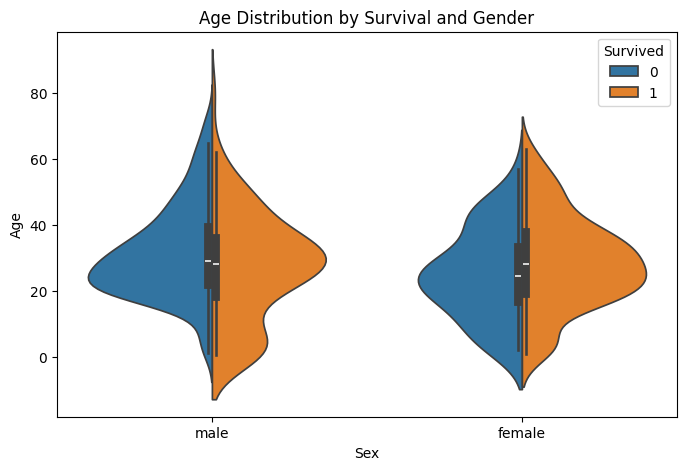

In [29]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='Sex', y='Age', hue='Survived', data=df, split=True)
plt.title("Age Distribution by Survival and Gender")
plt.show()
